# Convolution Neural Networks (CNNs)

Convolutional Neural Network or CNN, is a deep learning algorithm that is widely used for image and video recognition, as well as other tasks involving structured grid data. CNNs are designed to automatically and hierarchically learn complex features from raw input data without manual feature engineering. They have revolutionized the field of computer vision and achieved state-of-the-art performance on various image-related tasks.

Here's a simplified explanation of how CNNs work:

![CNN](assets/cnn.jpg)

## Convolution Layer

The input to a CNN is an image or a patch of an image. The first layer in a CNN is a convolutional layer that applies a set of learnable `filters` (also known as `kernels`) to the input image. Each filter performs a convolution operation by sliding across the image, computing dot products between the filter weights and the corresponding pixels in the input. This operation captures local patterns and features, such as edges, corners, and textures.

### Kernels aka Filters

Let's imagine you have a paragraph of text that you want to understand. When you read the paragraph, you start from the left and move to the right, extracting meaning from the words and sentences. You don't focus on individual letters, but rather interpret groups of letters as words. In a similar way, CNNs use kernels (also known as filters or feature detectors) to understand images.

An image is made up of pixels, just like text is made up of letters. Each pixel in an image is associated with a value ranging from 0 to 255, determining its intensity (Or 3 values per pixel for colored images, one for each of red, green and blue channels). The intelligence of CNNs lies in these kernels because they capture the essential information from the image, allowing the network to make predictions or perform tasks like image classification, object detection, or image segmentation.

![Kernels](assets/kernel.gif)


**How do Kernels Work?**

Imagine you have a grayscale image, like a black and white photo. Each pixel in the image has a specific value that represents its intensity. The kernel is a small matrix of values that we slide across the image.

To extract a feature, we take the kernel and place it on top of a part of the image. We then multiply each pixel in the kernel with the corresponding pixel in the image. We add up all these multiplications to get a single number, which represents the presence or absence of a certain feature in that part of the image.

This process is repeated as the kernel slides across the entire image, capturing different parts and extracting features from each. Each kernel focuses on detecting a specific pattern or feature. It gradually builds a hierarchical understanding, starting with low-level features like edges, corners and progressing to higher-level features like shapes, textures or objects.

**How do I define the values of a Kernel?**

The values in the kernel itself can be initialized randomly or set using a predefined function at the beginning. But as the network is trained with data, these values get adjusted to optimize the network's performance in extracting meaningful features.

### Strides

In real life each image is made up of thousands of tiny dots called pixels. Each pixel represents a color. When we want to process this picture using a Convolutional Neural Network (CNN), it can take a lot of time and computing power because there are so many pixels to consider.

To make things faster and more efficient, we can reduce the number of features, which are essentially the different patterns or characteristics that the CNN tries to learn from the image. One way to do this is by changing the `stride` parameter. The stride parameter determines how many pixels the CNN's analyzing window, called a kernel or filter, moves at a time.

In the previous example, we took a single step while moving the kernel i.e. the stride parameter has value `1` in this case. If you set two strides=2 then you take two step right in a row-wise and two steps down in a column-wise movement.


### Padding

In a Convolutional Neural Network (CNN), padding is used to add extra pixels around the borders of an image before applying convolution. Padding can help preserve spatial information, mitigate the loss of border pixels during convolution, and control the size of the output feature map. The added pixels create a buffer zone around the original image, allowing the kernel to traverse the borders and capture features from the entire image.

There are two common types of padding:

- **Valid (No Padding):** In this case, no padding is applied, and the kernel is only applied to positions where it fully overlaps with the input image. As a result, the output feature map will have smaller dimensions compared to the input image.

- **Same (Zero Padding):** The "same" padding ensures that the output feature map has the same spatial dimensions (width and height) as the input image. To achieve this, the number of padding pixels added to each dimension is determined by the kernel size. For an odd-sized kernel, the same number of pixels is added to both sides, while for an even-sized kernel, the extra pixel is added to the right/bottom side.

![Padding](assets/padding.png)

Padding helps in several ways:

- Retaining spatial dimensions: Zero padding ensures that the spatial dimensions of the input and output remain the same. This can be useful to maintain information at the borders of the image.

- Centering the kernel: Padding allows the kernel to be centered at the borders of the image, enabling it to process pixels in the border regions.

- Controlling downsampling: Padding can prevent significant downsampling of the image by reducing the stride effect. It helps in preserving more spatial information throughout the convolutional layers.

- Mitigating information loss: Padding helps in reducing the loss of important border pixels during convolution, which can be crucial in tasks like object detection or segmentation.

The output size after applying kernels, strides and padding is given by:

$Feature\ Map\ Size = \frac{Input\ Image\ size - Kernel\ size + 2 * Padding}{Stride} + 1$

In [ ]:
model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(filters = 16, kernel_size=(3,3), strides=(1,1), padding="same", activation='relu')
])

## Activation Function

After the convolution operation, an element-wise activation function (typically ReLU - Rectified Linear Unit) is applied to introduce non-linearity. This helps the network learn more complex representations.

## Pooling Layer

<video width="640" height="360" controls>
  <source src="./assets/pooling.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>


The video above is a very good demonstration of an insight that reducing the size of an image does not always result in information loss, as evidenced by the ability to identify a dog in a smaller version of the picture. Even a fraction (1/4th) of the original image is sufficient to deduce its content, obviating the need for processing the entire image in CNNs.

Pooling plays a crucial role in this scenario, facilitating the reduction of the feature map's size.

The primary purpose of pooling is to reduce the spatial dimensions of the feature map, maintaining relevant information while enhancing computational efficiency. Pooling achieves size reduction of the image (feature map) by employing a filter that extracts a single value from a block of features. The most common type of pooling is max pooling, which divides the input into small regions and outputs the maximum value within each region. This downsampling operation reduces the computational complexity and makes the network more robust to spatial translations and distortions.

![Pooling Workflow](assets/pooling.gif)

## Flattening and Fully Connected Layers

After several convolutional and pooling layers, the output is flattened and fed into one or more fully connected layers. These layers are similar to traditional artificial neural networks, where each neuron is connected to every neuron in the previous layer. The fully connected layers capture high-level features and patterns by learning complex combinations of the low-level features obtained from earlier layers.

![Flattening and Fully Connected Layers](./assets/flatten.jpg)

## Output Layer

The final fully connected layer is usually followed by an output layer with a suitable activation function depending on the task at hand. For instance, for image classification problems, a softmax activation is commonly used to produce a probability distribution over different classes.

## Training and Backpropagation

The CNN is trained using a large labeled dataset. During training, the network adjusts the weights of the filters and the fully connected layers to minimize the difference between the predicted outputs and the ground truth labels. This process is typically performed using an optimization algorithm called backpropagation, which computes the gradients of the loss function with respect to the network's parameters and updates them accordingly.

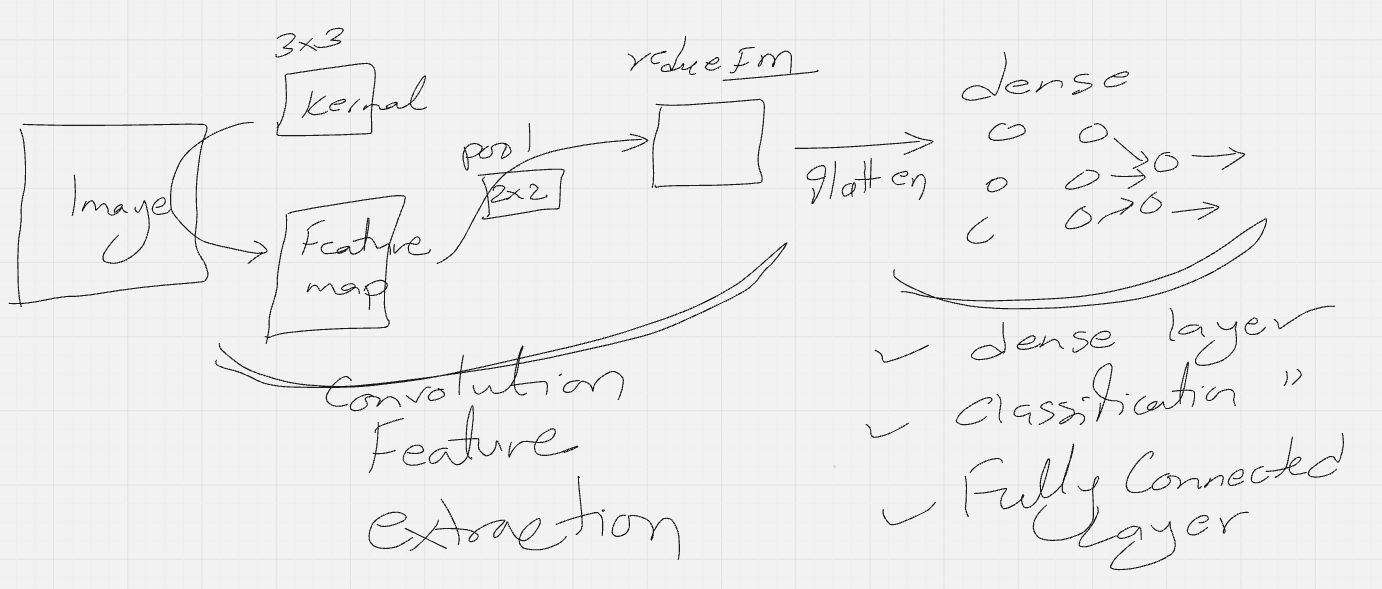